In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/games_of_all_time.csv')
model_data = data[['meta_score','user_score','platform','genre','type','rating']] 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_name    8831 non-null   object 
 1   meta_score   8831 non-null   float64
 2   user_score   8831 non-null   float64
 3   platform     8831 non-null   object 
 4   description  8831 non-null   object 
 5   url          8831 non-null   object 
 6   developer    8821 non-null   object 
 7   genre        8827 non-null   object 
 8   type         6727 non-null   object 
 9   rating       7691 non-null   object 
dtypes: float64(2), object(8)
memory usage: 690.0+ KB


In [6]:
model_data = model_data.dropna()
model_data.info()
model_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936 entries, 0 to 8830
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meta_score  5936 non-null   float64
 1   user_score  5936 non-null   float64
 2   platform    5936 non-null   object 
 3   genre       5936 non-null   object 
 4   type        5936 non-null   object 
 5   rating      5936 non-null   object 
dtypes: float64(2), object(4)
memory usage: 324.6+ KB


,meta_score,user_score,platform,genre,type,rating
0,99.0,91.0,['nintendo-64'],"['Action Adventure', 'Fantasy']",singleplayer,E
1,97.0,91.0,['wii'],"['Action', 'Platformer', '3D']",singleplayer,E
2,97.0,91.0,['wii'],"['Action', 'Platformer', '3D']",singleplayer,E
3,97.0,89.0,['gamecube'],"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,97.0,89.0,['switch'],"['Action', 'Platformer', '3D']",singleplayer,E10+


In [7]:
# exploding genre multiple values into individual rows
from ast import literal_eval
model_data['genre']=model_data['genre'].apply(literal_eval)
model_data = model_data.explode('genre', 'true')
# exploding platform multiple values into individual rows
model_data['platform']=model_data['platform'].apply(literal_eval)
model_data = model_data.explode('platform', 'true')
model_data.head(5)

,meta_score,user_score,platform,genre,type,rating
0,99.0,91.0,nintendo-64,Action Adventure,singleplayer,E
1,99.0,91.0,nintendo-64,Fantasy,singleplayer,E
2,97.0,91.0,wii,Action,singleplayer,E
3,97.0,91.0,wii,Platformer,singleplayer,E
4,97.0,91.0,wii,3D,singleplayer,E


In [8]:
model_data['genre'].value_counts()

Action              2864
General             1885
Action Adventure    1333
Shooter             1096
Role-Playing        1019
                    ... 
Tank                   1
Videos                 1
Drag                   1
Text                   1
WWI                    1
Name: genre, Length: 166, dtype: int64

In [9]:
#should we remove the genre values which have less data ?
sub_model_data = model_data[model_data.groupby('genre').genre.transform('count')>500].copy()

In [10]:
sub_model_data.info()
sub_model_data['genre'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17487 entries, 0 to 28051
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meta_score  17487 non-null  float64
 1   user_score  17487 non-null  float64
 2   platform    17487 non-null  object 
 3   genre       17487 non-null  object 
 4   type        17487 non-null  object 
 5   rating      17487 non-null  object 
dtypes: float64(2), object(4)
memory usage: 956.3+ KB


Action              2864
General             1885
Action Adventure    1333
Shooter             1096
Role-Playing        1019
Sports               907
Arcade               902
Miscellaneous        808
First-Person         753
3D                   690
Strategy             658
Platformer           638
2D                   618
Racing               574
Traditional          567
Sci-Fi               555
Adventure            550
Modern               542
Fantasy              528
Name: genre, dtype: int64

In [11]:
sub_model_data['genre'].nunique()

19

In [12]:
sub_model_data['platform'].value_counts()

pc                  3839
playstation-4       1768
xbox-360            1752
playstation-2       1492
playstation-3       1460
switch              1371
xbox                 929
xbox-one             907
ds                   766
wii                  707
psp                  569
gamecube             557
game-boy-advance     460
3ds                  229
playstation-vita     205
playstation          160
wii-u                125
nintendo-64           74
playstation-5         69
xbox-series-x         30
dreamcast             15
stadia                 3
Name: platform, dtype: int64

In [13]:
#should we replace multiple similar platform values to a single value e.g ps1,ps2 as ps
sub_model_data['platform']=sub_model_data['platform'].replace(['playstation-4','playstation-3','playstation-2',
                                                               'playstation-vita','playstation-5'],'playstation')
sub_model_data['platform']=sub_model_data['platform'].replace(['xbox-360','xbox-one','xbox-series-x'],'xbox')
sub_model_data['platform']=sub_model_data['platform'].replace(['wii-u'],'wii')

In [14]:
sub_model_data['platform'].value_counts()

playstation         5154
pc                  3839
xbox                3618
switch              1371
wii                  832
ds                   766
psp                  569
gamecube             557
game-boy-advance     460
3ds                  229
nintendo-64           74
dreamcast             15
stadia                 3
Name: platform, dtype: int64

In [15]:
#hot encoding
encoded_sub_model_data= pd.get_dummies(sub_model_data, columns=['platform','genre','type','rating'],prefix=['platform','genre','type','rating'])

In [16]:
encoded_sub_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17487 entries, 0 to 28051
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   meta_score                 17487 non-null  float64
 1   user_score                 17487 non-null  float64
 2   platform_3ds               17487 non-null  uint8  
 3   platform_dreamcast         17487 non-null  uint8  
 4   platform_ds                17487 non-null  uint8  
 5   platform_game-boy-advance  17487 non-null  uint8  
 6   platform_gamecube          17487 non-null  uint8  
 7   platform_nintendo-64       17487 non-null  uint8  
 8   platform_pc                17487 non-null  uint8  
 9   platform_playstation       17487 non-null  uint8  
 10  platform_psp               17487 non-null  uint8  
 11  platform_stadia            17487 non-null  uint8  
 12  platform_switch            17487 non-null  uint8  
 13  platform_wii               17487 non-null  uin

In [17]:
from sklearn.model_selection import train_test_split
X = encoded_sub_model_data.drop(columns=['user_score','meta_score']).values
y = encoded_sub_model_data[['user_score']].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [20]:
#Tensor flow linear regression model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
model = Sequential()
model.add(Dense(1,activation='relu'))



model.compile(optimizer='sgd',loss='mse')

C:\spring22\anaconda3\envs\255_project\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\spring22\anaconda3\envs\255_project\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\spring22\anaconda3\envs\255_project\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\spring22\anaconda3\envs\255_project\lib\site-packages\tensorf

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
X_train=X_train/256.
model.fit(X_train,
          y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=300)
# regression coefficients
#print('Coefficients: ', regModel.coef_)

Train on 10492 samples, validate on 6995 samples
Epoch 1/300
10492/10492 [==============================] - 0s 42us/sample - loss: 1685.3779 - val_loss: 359.0244
Epoch 2/300
10492/10492 [==============================] - 0s 15us/sample - loss: 217.7962 - val_loss: 167.8346
Epoch 3/300
10492/10492 [==============================] - 0s 24us/sample - loss: 164.3661 - val_loss: 159.0344
Epoch 4/300
10492/10492 [==============================] - 0s 21us/sample - loss: 162.3498 - val_loss: 158.3950
Epoch 5/300
10492/10492 [==============================] - 0s 23us/sample - loss: 162.2813 - val_loss: 158.3244
Epoch 6/300
10492/10492 [==============================] - 0s 23us/sample - loss: 162.2786 - val_loss: 158.2657
Epoch 7/300
10492/10492 [==============================] - 0s 24us/sample - loss: 162.2676 - val_loss: 158.2898
Epoch 8/300
10492/10492 [==============================] - 0s 24us/sample - loss: 162.2677 - val_loss: 158.2779
Epoch 9/300
10492/10492 [=============================

10492/10492 [==============================] - 0s 23us/sample - loss: 162.2738 - val_loss: 157.9673
Epoch 74/300
10492/10492 [==============================] - 0s 24us/sample - loss: 162.2679 - val_loss: 157.9397
Epoch 75/300
10492/10492 [==============================] - 0s 24us/sample - loss: 162.2770 - val_loss: 157.9284
Epoch 76/300
10492/10492 [==============================] - 0s 22us/sample - loss: 162.2739 - val_loss: 157.9309
Epoch 77/300
10492/10492 [==============================] - 0s 24us/sample - loss: 162.2638 - val_loss: 157.8598
Epoch 78/300
10492/10492 [==============================] - 0s 24us/sample - loss: 162.2729 - val_loss: 157.9126
Epoch 79/300
10492/10492 [==============================] - 0s 26us/sample - loss: 162.2891 - val_loss: 157.9289
Epoch 80/300
10492/10492 [==============================] - 0s 24us/sample - loss: 162.2727 - val_loss: 157.9556
Epoch 81/300
10492/10492 [==============================] - 0s 24us/sample - loss: 162.2643 - val_loss: 158.0

10492/10492 [==============================] - 0s 20us/sample - loss: 162.2715 - val_loss: 157.7533
Epoch 146/300
10492/10492 [==============================] - 0s 24us/sample - loss: 162.2692 - val_loss: 157.7092
Epoch 147/300
10492/10492 [==============================] - 0s 22us/sample - loss: 162.2673 - val_loss: 157.7447
Epoch 148/300
10492/10492 [==============================] - 0s 23us/sample - loss: 162.2698 - val_loss: 157.6727
Epoch 149/300
10492/10492 [==============================] - 0s 22us/sample - loss: 162.2723 - val_loss: 157.7244
Epoch 150/300
10492/10492 [==============================] - 0s 22us/sample - loss: 162.2650 - val_loss: 157.8077
Epoch 151/300
10492/10492 [==============================] - 0s 24us/sample - loss: 162.2694 - val_loss: 157.8215
Epoch 152/300
10492/10492 [==============================] - 0s 22us/sample - loss: 162.2777 - val_loss: 157.7415
Epoch 153/300
10492/10492 [==============================] - 0s 20us/sample - loss: 162.2786 - val_los

Epoch 217/300
10492/10492 [==============================] - 0s 21us/sample - loss: 162.2593 - val_loss: 157.6007
Epoch 218/300
10492/10492 [==============================] - 0s 20us/sample - loss: 162.2677 - val_loss: 157.5765
Epoch 219/300
10492/10492 [==============================] - 0s 15us/sample - loss: 162.2607 - val_loss: 157.4662
Epoch 220/300
10492/10492 [==============================] - 0s 15us/sample - loss: 162.2655 - val_loss: 157.5924
Epoch 221/300
10492/10492 [==============================] - 0s 12us/sample - loss: 162.2663 - val_loss: 157.5863
Epoch 222/300
10492/10492 [==============================] - 0s 21us/sample - loss: 162.2675 - val_loss: 157.6559
Epoch 223/300
10492/10492 [==============================] - 0s 19us/sample - loss: 162.2776 - val_loss: 157.5759
Epoch 224/300
10492/10492 [==============================] - 0s 23us/sample - loss: 162.2606 - val_loss: 157.4739
Epoch 225/300
10492/10492 [==============================] - 0s 22us/sample - loss: 162.

Epoch 289/300
10492/10492 [==============================] - 0s 20us/sample - loss: 162.2603 - val_loss: 157.4466
Epoch 290/300
10492/10492 [==============================] - 0s 19us/sample - loss: 162.2662 - val_loss: 157.4245
Epoch 291/300
10492/10492 [==============================] - 0s 21us/sample - loss: 162.2608 - val_loss: 157.4025
Epoch 292/300
10492/10492 [==============================] - 0s 19us/sample - loss: 162.2734 - val_loss: 157.3646
Epoch 293/300
10492/10492 [==============================] - 0s 19us/sample - loss: 162.2616 - val_loss: 157.2564
Epoch 294/300
10492/10492 [==============================] - 0s 19us/sample - loss: 162.2664 - val_loss: 157.4385
Epoch 295/300
10492/10492 [==============================] - 0s 19us/sample - loss: 162.2520 - val_loss: 157.5543
Epoch 296/300
10492/10492 [==============================] - 0s 18us/sample - loss: 162.2635 - val_loss: 157.5612
Epoch 297/300
10492/10492 [==============================] - 0s 23us/sample - loss: 162.

In [22]:
from tensorflow.keras.models import load_model
model.save('aditya_model')
# variance score: 1 means perfect prediction
#print('Variance score: {}'.format(regModel.score(X_test, y_test)))

In [23]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

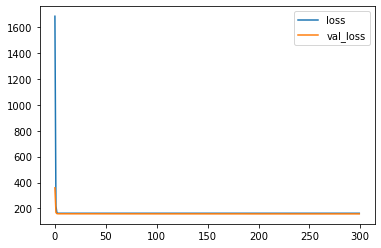

In [24]:
losses[['loss','val_loss']].plot()

In [25]:
X_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [26]:
prediction = model.predict(X_test)
prediction

array([[72.06227 ],
       [69.637955],
       [71.52281 ],
       ...,
       [69.62974 ],
       [70.479164],
       [71.68678 ]], dtype=float32)

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
mean_absolute_error(y_test,prediction)

9.647620513239785

In [28]:
np.sqrt(mean_squared_error(y_test,prediction))

12.546724618612927

In [29]:
explained_variance_score(y_test,prediction)

0.008949775892540979

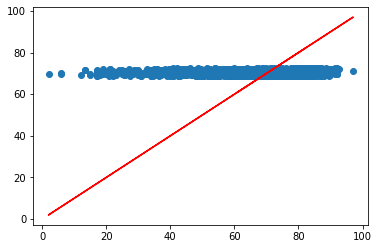

In [30]:
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction)
plt.plot(y_test,y_test,'r')

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train,y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [32]:
pipe.score(X_test, y_test)


-1.87401278744795e+32

In [33]:
y_pred= pipe.predict(X_test)
y_pred

array([[1.72265356e+17],
       [1.72265356e+17],
       [1.72265356e+17],
       ...,
       [1.72265356e+17],
       [1.72265356e+17],
       [1.72265356e+17]])

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#should be between 0-1
score =r2_score(y_test,y_pred)
print("r2 score is:",score)

r2 score is: -1.87401278744795e+32


In [38]:
from sklearn.ensemble import RandomForestRegressor
#rf_model=RandomForestRegressor(n_estimators=1000,random_state=0)
pipe1 = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=1000,random_state=0))
pipe1.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=1000, random_state=0))])

In [39]:
pipe1.score(X_test,y_test)

-0.01664186428949188